# Detector Gain

You could calculate the mean of each flat image manually using IRAF. Alternatively, you could calculate the means for all of the images automatically using Python.

In [29]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
# glob serves some of the same functions as ls in the terminal
import glob

## FITS Headers
The headers of the FITS files contain the exposure times of the flat images. Now we use `fits.open` instead of `fits.getdata`. HDU stands for Header/Data Unit.

In [30]:
hdu = fits.open('Flat1s.fits')
header1 = hdu[0].header
print(header['exptime'])

NameError: name 'header' is not defined

## Calculating Mean Counts
We can find all of the flat images, assuming they all have 'Flat' in the name.
#### You will need to change the path to the directory containing your data.

In [37]:
# This is equivalent to $ ls Flat*.fits
flat_list = glob.glob('Flat*.fits')
print(flat_list)

['Flat18.fits', 'Flat.0125s.fits', 'Flat54.fits', 'Flat2.25.fits', 'Flat1m.fits', 'Flat81.fits', 'Flat63.fits', 'Flat27.fits', 'Flat45.fits', 'Flat9s.fits', 'Flat.5625s.fits', 'Flat72.fits', 'Flat30s.fits', 'Flat.28125s.fits', 'Flat2s.fits', 'Flat1s.fits', 'Flat36.fits']


Now we can loop through each flat image, and keep track of the exposure time and mean counts

In [38]:
# These are empty lists (arrays) to store the exposure times and mean counts
exp_times = []
means = []

for filename in flat_list:
    # Open the FITS file
    hdu = fits.open(filename)
    
    exptime = hdu[0].header['exptime']
    print('Exposure time {} sec'.format(exptime))
    
    # This will append the exposure time for each image to the array
    exp_times.append(exptime)
    
    # Same for mean counts
    mean_counts = np.mean(hdu[0].data)
    print('Mean counts: {:.2f}\n'.format(mean_counts))
    means.append(mean_counts)

# Convert to Numpy arrays so they can be sorted
exp_times = np.array(exp_times)
means = np.array(means)

# Sort by exposure time so the plot looks correct
time_sort = np.argsort(exp_times)
exp_times = exp_times[time_sort]
means = means[time_sort]

Exposure time 18.0 sec
Mean counts: 58514.69

Exposure time 1.125 sec
Mean counts: 58525.74

Exposure time 54.0 sec
Mean counts: 58520.90

Exposure time 0.12 sec
Mean counts: 58259.32

Exposure time 90.0 sec
Mean counts: 58515.42

Exposure time 81.0 sec
Mean counts: 58503.41

Exposure time 63.0 sec
Mean counts: 58502.91

Exposure time 27.0 sec
Mean counts: 58523.80

Exposure time 45.0 sec
Mean counts: 58517.81

Exposure time 9.0 sec
Mean counts: 58520.26

Exposure time 0.562 sec
Mean counts: 58525.80

Exposure time 72.0 sec
Mean counts: 58516.21

Exposure time 0.12 sec
Mean counts: 58262.76

Exposure time 0.281 sec
Mean counts: 58527.59

Exposure time 2.0 sec
Mean counts: 58527.30

Exposure time 1.0 sec
Mean counts: 58525.52

Exposure time 36.0 sec
Mean counts: 58507.90



## Plot mean counts versus exposure time


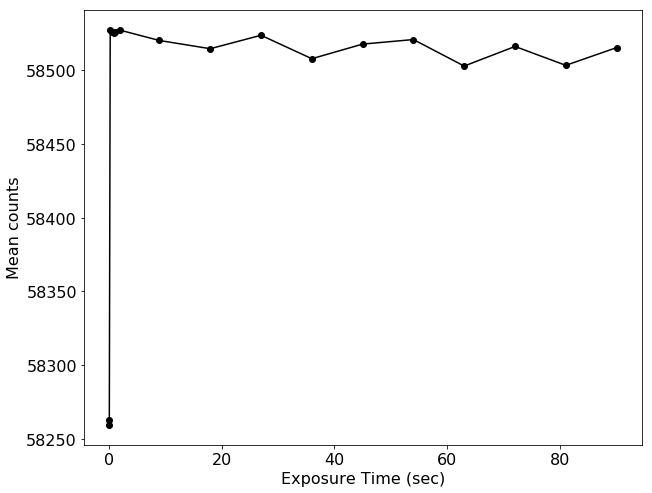

In [39]:
plt.figure(figsize=(10, 8))
plt.rcParams['font.size'] = 16

plt.plot(exp_times, means, '-ko')
plt.xlabel('Exposure Time (sec)')
plt.ylabel('Mean counts')
plt.show()

In [43]:
# This is equivalent to $ ls Flat*.fits
flat_list2 = glob.glob('*R.*.fits')
print(flat_list2)

['480_2018_.Flat.100S0X1.R.15.fits', '480_2018_.Flat.30S0X1.R.25.fits', '480_2018_.Flat.90S0X1.R.20.fits', '480_2018_.Flat.10S0X1.R.23.fits', '480_2018_.Flat.1S0X1.R.18.fits', '480_2018_.Flat.45S0X1.R.26.fits', '480_2018_.Flat.0S0X1.R.17.fits', '480_2018_.Flat.120S0X1.R.13.fits', '480_2018_.Flat.60S0X1.R.21.fits', '480_2018_.Flat.20S0X2.R.27.fits', '480_2018_.Flat.0S0X1.R.16.fits', '480_2018_.Flat.110S0X1.R.14.fits', '480_2018_.Flat.60S0X1.R.22.fits', '480_2018_.Flat.5S0X1.R.19.fits']


In [44]:
# These are empty lists (arrays) to store the exposure times and mean counts
exp_times = []
means = []

for filename in flat_list:
    # Open the FITS file
    hdu = fits.open(filename)
    
    exptime = hdu[0].header['exptime']
    print('Exposure time {} sec'.format(exptime))
    
    # This will append the exposure time for each image to the array
    exp_times.append(exptime)
    
    # Same for mean counts
    mean_counts = np.mean(hdu[0].data)
    print('Mean counts: {:.2f}\n'.format(mean_counts))
    means.append(mean_counts)

# Convert to Numpy arrays so they can be sorted
exp_times = np.array(exp_times)
means = np.array(means)

# Sort by exposure time so the plot looks correct
time_sort = np.argsort(exp_times)
exp_times = exp_times[time_sort]
means = means[time_sort]

Exposure time 18.0 sec
Mean counts: 58514.69

Exposure time 1.125 sec
Mean counts: 58525.74

Exposure time 54.0 sec
Mean counts: 58520.90

Exposure time 0.12 sec
Mean counts: 58259.32

Exposure time 90.0 sec
Mean counts: 58515.42

Exposure time 81.0 sec
Mean counts: 58503.41

Exposure time 63.0 sec
Mean counts: 58502.91

Exposure time 27.0 sec
Mean counts: 58523.80

Exposure time 45.0 sec
Mean counts: 58517.81

Exposure time 9.0 sec
Mean counts: 58520.26

Exposure time 0.562 sec
Mean counts: 58525.80

Exposure time 72.0 sec
Mean counts: 58516.21

Exposure time 0.12 sec
Mean counts: 58262.76

Exposure time 0.281 sec
Mean counts: 58527.59

Exposure time 2.0 sec
Mean counts: 58527.30

Exposure time 1.0 sec
Mean counts: 58525.52

Exposure time 36.0 sec
Mean counts: 58507.90



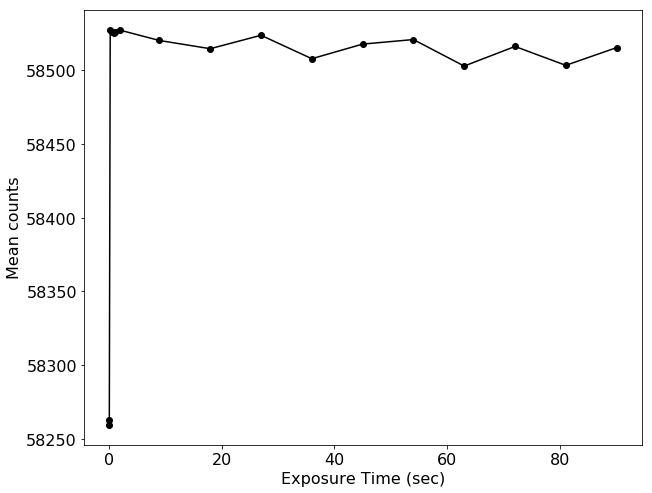

In [45]:
plt.figure(figsize=(10, 8))
plt.rcParams['font.size'] = 16

plt.plot(exp_times, means, '-ko')
plt.xlabel('Exposure Time (sec)')
plt.ylabel('Mean counts')
plt.show()